# Reading a Nion File with ScopeReader

**Gerd Duscher**

12/05/2020

**This document is a simple example of how to read Nion Files into the sidpy dataformat**

**UNDER CONSTRUCTION**

## Introduction

Swift from Nion runs on all of Nion's STEMs for acquisition.
We read and plot such files here.

## Import all necessary packages

There are a few setup procedures that need to be followed before any code is written. In this step, we simply load a
few python packages that will be necessary in the later steps.


In [1]:
%pylab notebook
%gui qt
import os
import sys
from sidpy.io.interface_utils import openfile_dialog
sys.path.append('../')
from ScopeReaders.em.tem.nion_reader import NionReader
import ScopeReaders
print('ScopeReaders version: ', ScopeReaders.__version__)
import sidpy
print('sidpy version: ', sidpy.__version__)

Populating the interactive namespace from numpy and matplotlib
ScopeReaders version:  0.0.0
sidpy version:  0.0.4


## Open a file dialog

Here we select the name of the file to open. We will be using the sidpy interface to do that.

The ``openfile_dialog`` will open QT file dialog to select a file.

For examples go to the ``example_data`` directory in the original folder of this notebook.

Note.: in some operating systems the window will not show up on top, look in your task bar.

In [5]:
file_name = openfile_dialog()
print(file_name)

C:/Users/gduscher/Documents/GitHub/ScopeReaders/notebooks/example_data/STO_Image_Stack_(HAADF).h5


###  Catch a bad selection or cancelling of file selection

In [6]:
if len(file_name) < 3:
    print('No valid file selected')
else:
    path, base_file_name = os.path.split(file_name)
    basename, extension = os.path.splitext(base_file_name)
    if extension not in ['.ndata', '.h5']:
        print('File not supported')

## Read file
We use the ScopeReader to read the file into a sidpy dataset.
All metadata (absolutely everything) is saved in the ``original_metadata`` attribute
of the sidpy Dataset. If the selected file is not a Nion File you get a ``TypeError``.

In [7]:
nion_reader = NionReader(file_name)
dataset = nion_reader.read()

print(dataset)
dataset

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<generic, shape=(25, 512, 512), dtype=float32, chunksize=(25, 512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
frame:  stack (frame) of size (25,)
y:  distance (nm) of size (512,)
x:  distance (nm) of size (512,)


sidpy.Dataset of type IMAGE_STACK with:
 dask.array<generic, shape=(25, 512, 512), dtype=float32, chunksize=(25, 512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
frame:  stack (frame) of size (25,)
y:  distance (nm) of size (512,)
x:  distance (nm) of size (512,)

## Plot File
Only one command is necessary to plot the file.

<IPython.core.display.Javascript object>


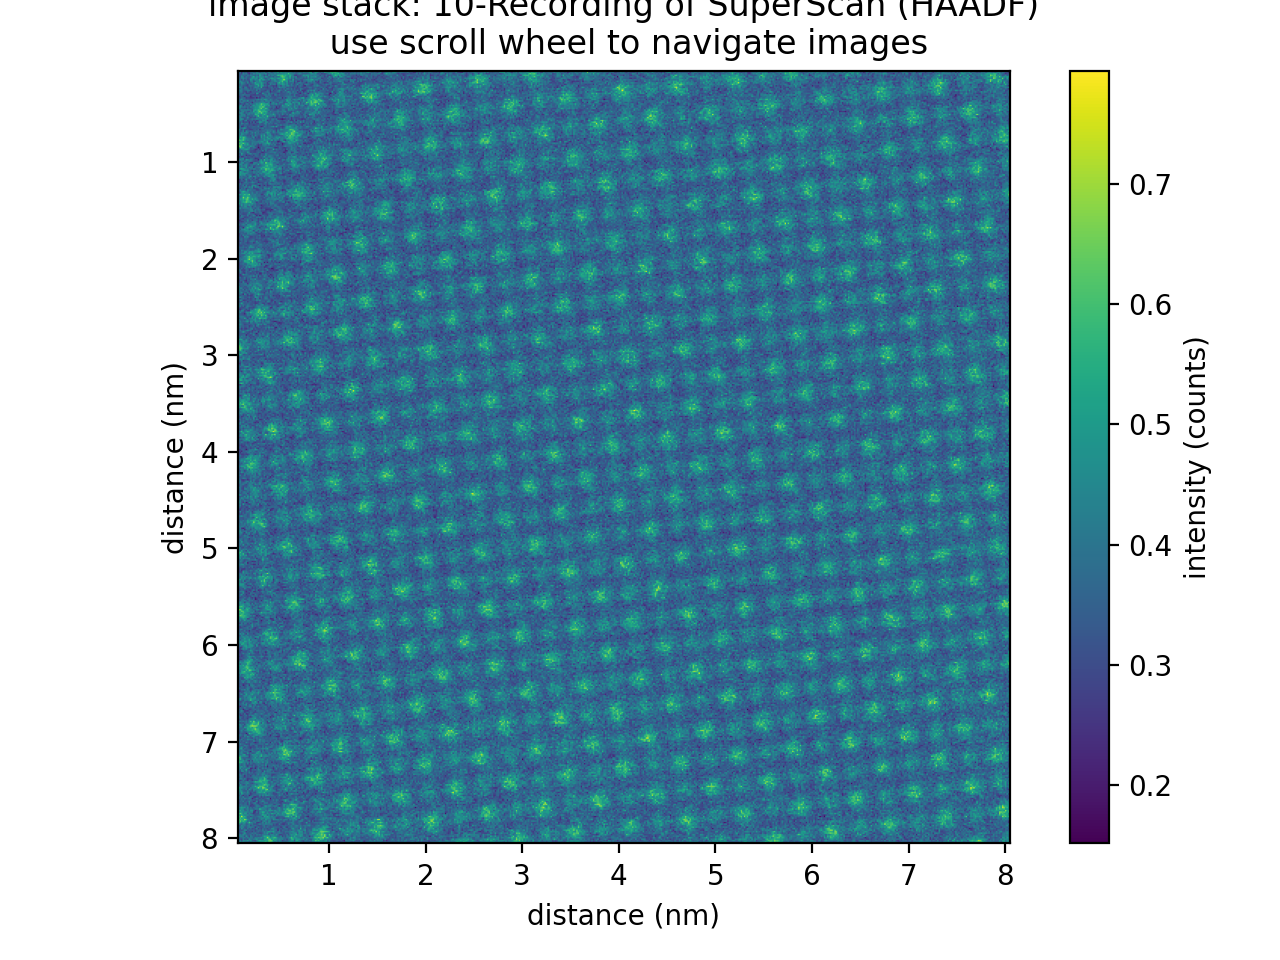

In [8]:
dataset.plot()

##  Original Metadata
Digital micrograph stores a lot of metadata in the file and we read all of them and store that information in the ``original_metadata``. 

In [9]:
dataset.view_original_metadata()

type : data-item
uuid : 7072bef6-4167-4107-85ee-ce2856e9cefd
created : 2020-03-23T14:33:18.028533
data_shape : [25, 512, 512]
data_dtype : float32
is_sequence : True
collection_dimension_count : 0
datum_dimension_count : 2
intensity_calibration :
	offset : 0.0
	scale : 1.0
	units : 
dimensional_calibrations : [{'offset': 0.0, 'scale': 1.0, 'units': 'pixels'}, {'offset': -4.0, 'scale': 0.015625, 'units': 'nm'}, {'offset': -4.0, 'scale': 0.015625, 'units': 'nm'}]
data_modified : 2020-03-23T14:33:18.032515
timezone : America/New_York
timezone_offset : -0400
metadata :
	hardware_source :
		ImageScanned:BP1.^VOACurrent : 2.03868e-09
		ImageScanned:C1 ConstW : 0.338
		ImageScanned:C10 : 7.627e-08
		ImageScanned:C12.a : 5.53324e-09
		ImageScanned:C12.b : 2.77692e-09
		ImageScanned:C21.a : 5.23255e-08
		ImageScanned:C21.b : -1.68525e-07
		ImageScanned:C23.a : -3.59977e-08
		ImageScanned:C23.b : -2.71277e-08
		ImageScanned:C30 : 4.22104e-07
		ImageScanned:C32.a : 3.96865e-06
		ImageScanned:C32.